### PATTERN RECOGNITION - ASSIGNMENT #1

| ID | Name |
|-----------------|-----------------|
| 19015906  | Abdelrahman Khayri Saad  |
| 20011800  | Mahmoud Tarek Embaby |
| 20010698  | Sama Tarek Zayed |
_________________

### 2. Generate the Data Matrix and the Label vector

In [2]:
import numpy as np
from PIL import Image

def image_to_vector(file_path):
    """ Convert a pgm file to a vector """
    img = Image.open(file_path)
    img = img.convert('L')
    img = img.resize((92, 112))
    img_data = list(img.getdata())
    img_vector = np.array(img_data)
    return img_vector.flatten()

D = [] # Data Matrix
y = [] # Label vector

for subject_id in range(1, 41):
    for file_id in range(1, 11):
        img_vector = image_to_vector(f'data/archive/s{subject_id}/{file_id}.pgm')
        D.append(img_vector)
        y.append(subject_id)

D = np.array(D)
y = np.array(y)

print('• Data Matrix Shape:', D.shape)
print('• Label Vector Shape:', y.shape)

min_intensity = np.min(D)
max_intensity = np.max(D)

print("• Minimum intensity (White):", min_intensity)
print("• Maximum intensity (Black):", max_intensity)

• Data Matrix Shape: (400, 10304)
• Label Vector Shape: (400,)
• Minimum intensity (White): 0
• Maximum intensity (Black): 251


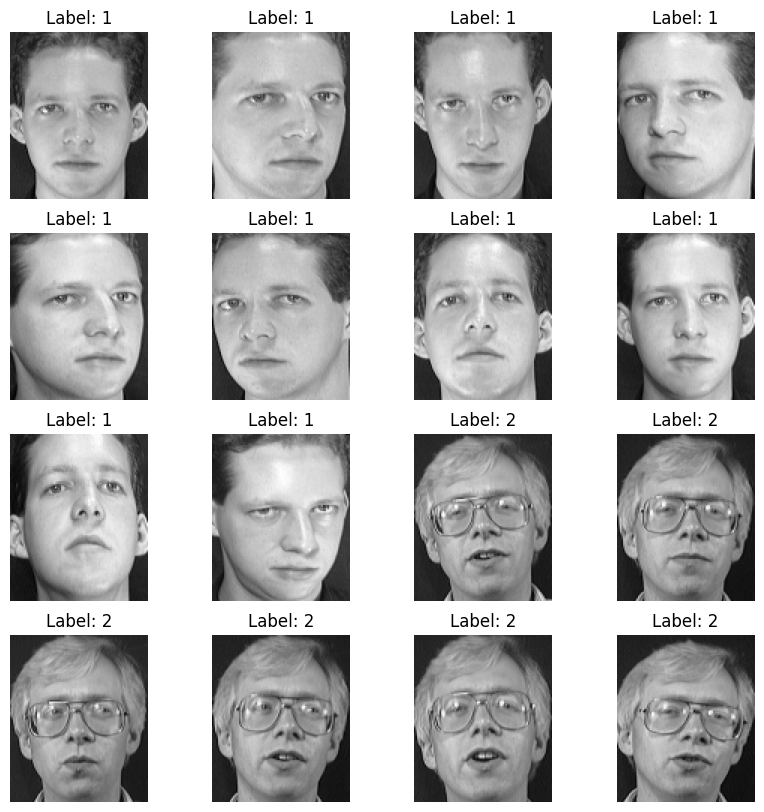

In [2]:
# Sample of Images
import matplotlib.pyplot as plt
fig, ax = plt.subplots(4, 4, figsize=(10, 10))
for i in range(16):
    ax[i//4, i%4].imshow(D[i].reshape(112, 92), cmap='gray')
    ax[i//4, i%4].set_title(f'Label: {y[i]}')
    ax[i//4, i%4].axis('off')

In [3]:
import pandas as pd
df = pd.DataFrame(D)
df['label'] = y
df

,0,1,2,3,4,5,6,7,8,9,...,10295,10296,10297,10298,10299,10300,10301,10302,10303,label
0,48,49,45,47,49,57,39,42,53,49,...,44,40,41,49,42,44,47,46,46,1
1,60,60,62,53,48,51,61,60,71,68,...,35,28,33,31,31,37,32,34,34,1
2,39,44,53,37,61,48,61,45,35,40,...,30,36,32,28,32,31,29,26,29,1
3,63,53,35,36,33,34,31,35,39,43,...,169,166,161,158,169,137,41,10,24,1
4,64,76,80,53,34,72,60,66,66,50,...,28,34,32,35,34,35,35,37,39,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,123,121,126,122,127,127,123,124,123,127,...,47,34,36,42,34,39,40,35,42,40
396,129,127,133,124,131,129,130,129,127,132,...,92,93,90,90,92,89,93,93,93,40
397,125,119,124,125,124,121,123,125,123,123,...,34,38,37,32,41,40,36,39,40,40
398,119,120,120,118,120,121,121,116,120,121,...,88,87,97,101,91,93,89,94,85,40


### 3. Split the Dataset into Training and Test sets

In [4]:
X_train = D[1::2] # Odd rows for training
X_test = D[::2]  # Even rows for testing

y_train = y[1::2] # Labels for testing set
y_test = y[::2] # Labels for training set

print('Training set shape:', X_train.shape)
print('Testing set shape: ', X_test.shape)

print('Training labels shape:', y_train.shape)
print('Testing labels shape: ', y_test.shape)

Training set shape: (200, 10304)
Testing set shape:  (200, 10304)
Training labels shape: (200,)
Testing labels shape:  (200,)


In [4]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,10294,10295,10296,10297,10298,10299,10300,10301,10302,10303
0,60,60,62,53,48,51,61,60,71,68,...,27,35,28,33,31,31,37,32,34,34
1,63,53,35,36,33,34,31,35,39,43,...,173,169,166,161,158,169,137,41,10,24
2,43,50,41,58,78,83,67,48,44,46,...,167,164,164,162,159,156,155,158,153,169
3,44,43,32,32,30,30,38,40,48,66,...,37,42,42,40,33,29,37,43,43,37
4,34,34,33,32,38,40,39,49,54,57,...,42,44,38,30,37,30,36,37,40,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,127,131,128,129,127,128,127,128,128,129,...,91,90,87,91,90,90,89,94,84,89
196,130,123,127,125,126,126,127,125,125,127,...,39,34,33,37,34,38,41,33,37,40
197,123,121,126,122,127,127,123,124,123,127,...,29,47,34,36,42,34,39,40,35,42
198,125,119,124,125,124,121,123,125,123,123,...,40,34,38,37,32,41,40,36,39,40


### 4. Classification using PCA

In [5]:
import numpy as np

def PCA(dataMatrix: np.ndarray, alpha: float):
    mean = np.mean(dataMatrix, axis=0)
    Z = dataMatrix - mean
    COV = np.matmul(Z.T, Z) / (Z.shape[0])
    eigenvalues, eigenvectors = np.linalg.eigh(COV)
    indeces = np.arange(0, len(eigenvalues), 1)
    sorted_idx = [x for _,x in sorted(zip(eigenvalues, indeces))][::-1]
    eigenvalues = eigenvalues[sorted_idx]
    eigenvectors = eigenvectors[:, sorted_idx]
    total_variance = np.sum(eigenvalues)
    variance = 0
    i = 0
    while i < len(eigenvalues):
        variance += eigenvalues[i]
        if variance / total_variance >= alpha:
            break
        i += 1
    
    U = np.array(eigenvectors[:, 0:i+1])
    model_name = "tmp/PCA_" + str(alpha) + "_" + str(dataMatrix.shape[0]) + "_" + str(dataMatrix.shape[1])
    
    with open(model_name, "wb") as f:
        np.save(f, U)
    
    return U, eigenvectors
    

In [22]:
from sklearn.neighbors import KNeighborsClassifier

alphas = [0.8, 0.85, 0.9, 0.95]
PCA_projection_matrix = []

for alpha in alphas:
    U, eigenvectors= PCA(X_train, alpha)
    PCA_projection_matrix.append([U, eigenvectors])


X_train_projected = [X_train.dot(U[0]) for U in PCA_projection_matrix]
X_test_projected = [X_test.dot(U[0]) for U in PCA_projection_matrix]
# Define the classifier
classifier = KNeighborsClassifier(n_neighbors=1)

# Train and predict for each projected training and test set
accuracies = []
for X_train_proj, X_test_proj in zip(X_train_projected, X_test_projected):
    classifier.fit(X_train_proj, y_train)
    accuracy = classifier.score(X_test_proj, y_test)
    accuracies.append(accuracy)

print("Accuracy for different values of alpha:", accuracies)


Accuracy for different values of alpha: [0.93, 0.94, 0.945, 0.935]


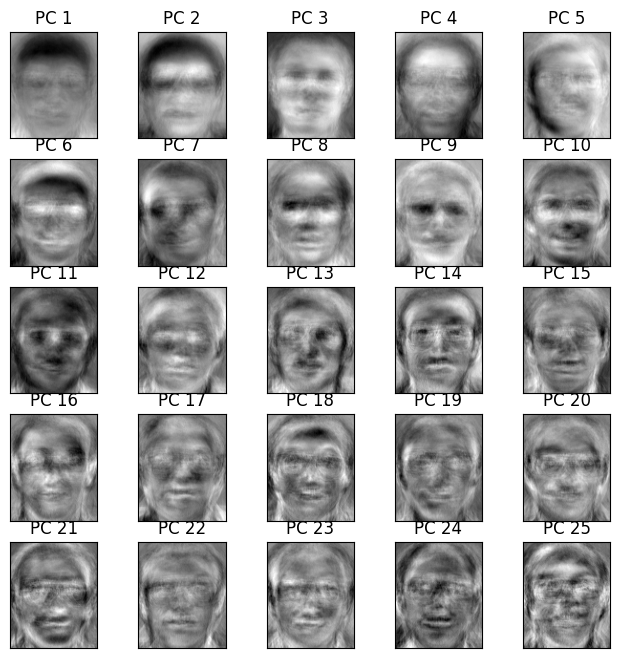

In [23]:
import matplotlib.pyplot as plt
def display_eigenfaces(data):
	fig, axes = plt.subplots(5,5, figsize=(8, 8), subplot_kw={'xticks':[], 'yticks':[]})
	for i, ax in enumerate(axes.flat):
	    ax.imshow(data[i].reshape(112, 92), cmap='gray')
	    ax.set_title("PC " + str(i+1))
	plt.show()

eigenvectors_of_08_alpha = PCA_projection_matrix[0][1].T
display_eigenfaces(eigenvectors_of_08_alpha)

In [24]:
from sklearn.metrics import classification_report

for X_train_proj, X_test_proj in zip(X_train_projected, X_test_projected):
    classifier.fit(X_train_proj, y_train)
    y_pred = classifier.predict(X_test_proj)
    print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.60      0.75         5
           2       0.71      1.00      0.83         5
           3       0.83      1.00      0.91         5
           4       1.00      1.00      1.00         5
           5       0.62      1.00      0.77         5
           6       1.00      1.00      1.00         5
           7       0.71      1.00      0.83         5
           8       1.00      1.00      1.00         5
           9       1.00      1.00      1.00         5
          10       1.00      0.80      0.89         5
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         5
          14       1.00      1.00      1.00         5
          15       0.83      1.00      0.91         5
          16       0.83      1.00      0.91         5
          17       1.00      1.00      1.00         5
          18       1.00    

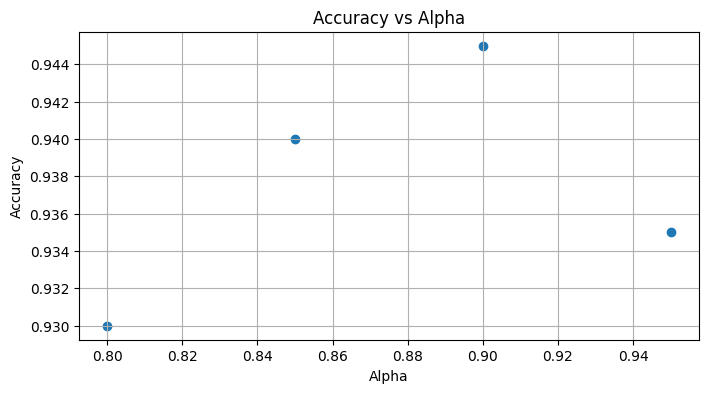

In [26]:
plt.scatter(alphas, accuracies)
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.grid()
plt.title('Accuracy vs Alpha')
plt.gcf().set_size_inches(8, 4)
plt.show()

#### Can you find a relation between alpha and classification accuracy?
For a constant K-value, the classification accuracy increases as alpha approaches to a certain value, then decreases gradually as alpha increases over that value.

### 5. Classification Using LDA

In [15]:
import numpy as np
import scipy as sc

def LDA(D, labels, eigens=39):
    classes = np.unique(labels)
    n_classes = len(classes)
    n_features = D.shape[1]

    means = np.zeros((n_classes, n_features))
    S = np.zeros((n_features, n_features))
    SB = np.zeros((n_features, n_features))

    overall_mean = np.mean(D, axis=0)

    for i, class_label in enumerate(classes):
        class_indices = np.where(labels == class_label)[0]
        class_data = D[class_indices]
        means[i] = np.mean(class_data, axis=0)
        diff = class_data - means[i]
        S += np.dot(diff.T, diff)
        SB += class_indices.shape[0] * np.outer(means[i] - overall_mean, (means[i] - overall_mean).T)

    dott = np.dot((sc.linalg.pinv(S)), SB)
    eigenvalues, eigenvectors =sc.linalg.eig(dott)

    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]

    U = eigenvectors[:, :eigens]
    return eigenvalues, U.real

In [28]:
eigenvalues2, U2 = LDA(X_train, y_train)

In [29]:
from sklearn.neighbors import KNeighborsClassifier

X_train_lda = np.dot(X_train, U2)
X_test_lda = np.dot(X_test, U2)

kn = KNeighborsClassifier(n_neighbors=1)
kn.fit(X_train_lda, y_train)
accuracy_lda = kn.score(X_test_lda, y_test)
print("Accuracy for LDA:", accuracy_lda)


Accuracy for LDA: 0.96


In [30]:
from sklearn.metrics import classification_report

y_pred = kn.predict(X_test_lda)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.80      0.89         5
           2       0.83      1.00      0.91         5
           3       0.83      1.00      0.91         5
           4       1.00      1.00      1.00         5
           5       0.83      1.00      0.91         5
           6       1.00      1.00      1.00         5
           7       0.83      1.00      0.91         5
           8       1.00      1.00      1.00         5
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         5
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         5
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00         5
          16       0.83      1.00      0.91         5
          17       1.00      1.00      1.00         5
          18       1.00    

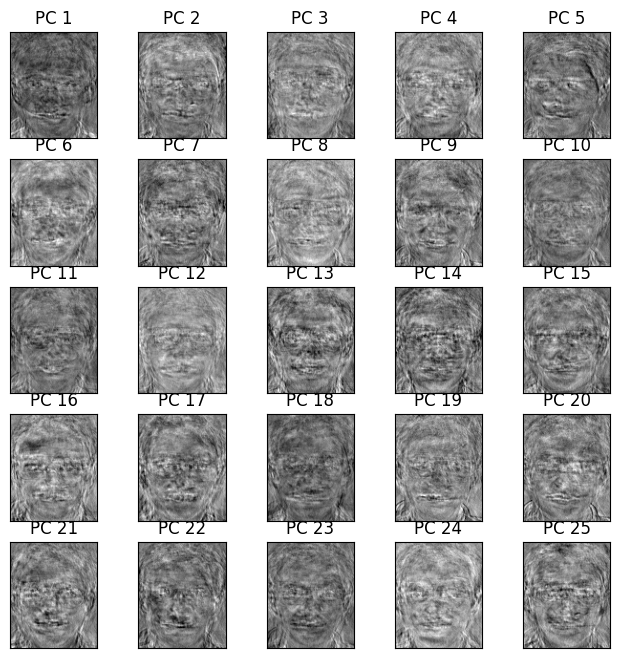

In [31]:
display_eigenfaces(U2.T)

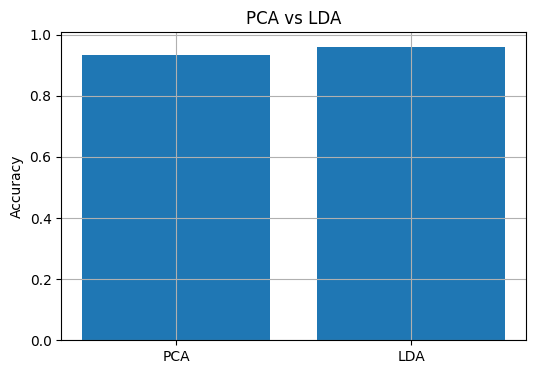

In [35]:
# PCA vs LDA - Accuracy
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
ax.bar(['PCA', 'LDA'], [accuracies[-1], accuracy_lda])
ax.set_ylabel('Accuracy')
ax.set_title('PCA vs LDA')
ax.grid()
plt.gcf().set_size_inches(6, 4)
plt.show()


### 6. Classifier Tuning

Best accuracy for PCA [AT K=1]: [0.93, 0.94, 0.945, 0.935]
Best accuracy for LDA [AT K=1]: 0.96


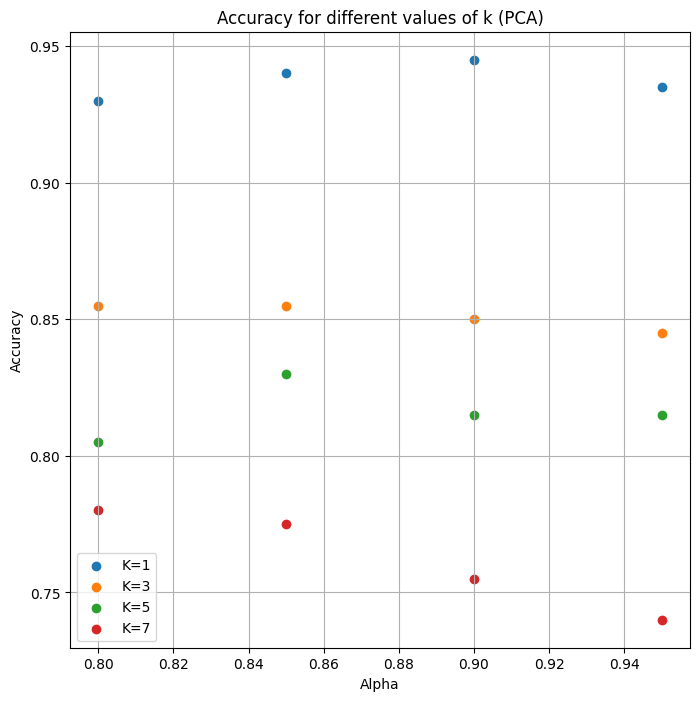

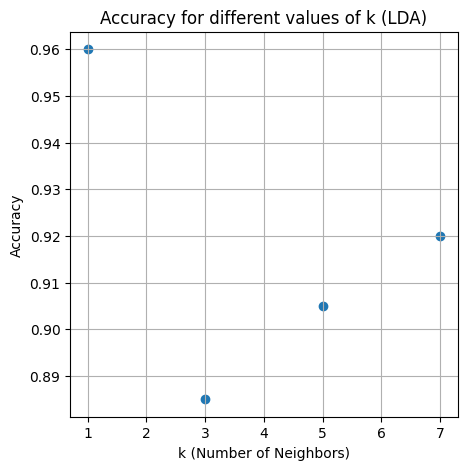

In [32]:
test_neighbors = [1, 3, 5, 7]
PCA_accuracy = []
LDA_accuracy = []

for k in test_neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k)
    accuracies = []
    for X_train_proj, X_test_proj in zip(X_train_projected, X_test_projected):
        classifier.fit(X_train_proj, y_train)
        accuracy = classifier.score(X_test_proj, y_test)
        accuracies.append(accuracy)
    PCA_accuracy.append(accuracies)

    classifier.fit(X_train_lda, y_train)
    accuracy = classifier.score(X_test_lda, y_test)
    LDA_accuracy.append(accuracy)

print(f'Best accuracy for PCA [AT K={test_neighbors[PCA_accuracy.index(max(PCA_accuracy))]}]: {max(PCA_accuracy)}')
print(f'Best accuracy for LDA [AT K={test_neighbors[LDA_accuracy.index(max(LDA_accuracy))]}]: {max(LDA_accuracy)}')

plt.figure(figsize=(8, 8))  # Create a single figure

# Iterate over each row of PCA_accuracy
for i, row in enumerate(PCA_accuracy):
    plt.scatter(alphas, row, label=f"K={test_neighbors[i]}")  # Specify label for legend
    
plt.title("Accuracy for different values of k (PCA)")
plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()  # Show legend with labels for different K values
plt.show()


plt.figure(figsize=(5, 5))
# plt.plot(test_neighbors, LDA_accuracy, marker='o', linestyle='-')
plt.scatter(test_neighbors, LDA_accuracy)
plt.title('Accuracy for different values of k (LDA)')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()



In [35]:
from sklearn.metrics import classification_report

for k in test_neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k)
    for X_train_proj, X_test_proj in zip(X_train_projected, X_test_projected):
        classifier.fit(X_train_proj, y_train)
    print(f'Accuracy for different values of alpha [AT K={k}]: {accuracies}')
    print(classification_report(y_test, y_pred))

for k in test_neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train_lda, y_train)
    print(f'Accuracy for different values of alpha [AT K={k}]: {accuracies}')
    print(classification_report(y_test, y_pred))

Accuracy for different values of alpha [AT K=1]: [0.78, 0.775, 0.755, 0.74]
              precision    recall  f1-score   support

           1       1.00      0.80      0.89         5
           2       0.83      1.00      0.91         5
           3       0.83      1.00      0.91         5
           4       1.00      1.00      1.00         5
           5       0.83      1.00      0.91         5
           6       1.00      1.00      1.00         5
           7       0.83      1.00      0.91         5
           8       1.00      1.00      1.00         5
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         5
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         5
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00         5
          16       0.83      1.00      0.91         5
     

### 7. Compare vs Non-Face Images

In [7]:
import os

iris_images = []
for dir in ['iris-setosa', 'iris-versicolour', 'iris-virginica', 'misc']:
    for image in os.listdir(f'data/iris/{dir}'):
        if '.jpg' not in image: continue
        img_vector = image_to_vector(f'data/iris/{dir}/{image}')
        iris_images.append(img_vector)

iris_images = np.array(iris_images)
iris_images.shape

(1200, 10304)

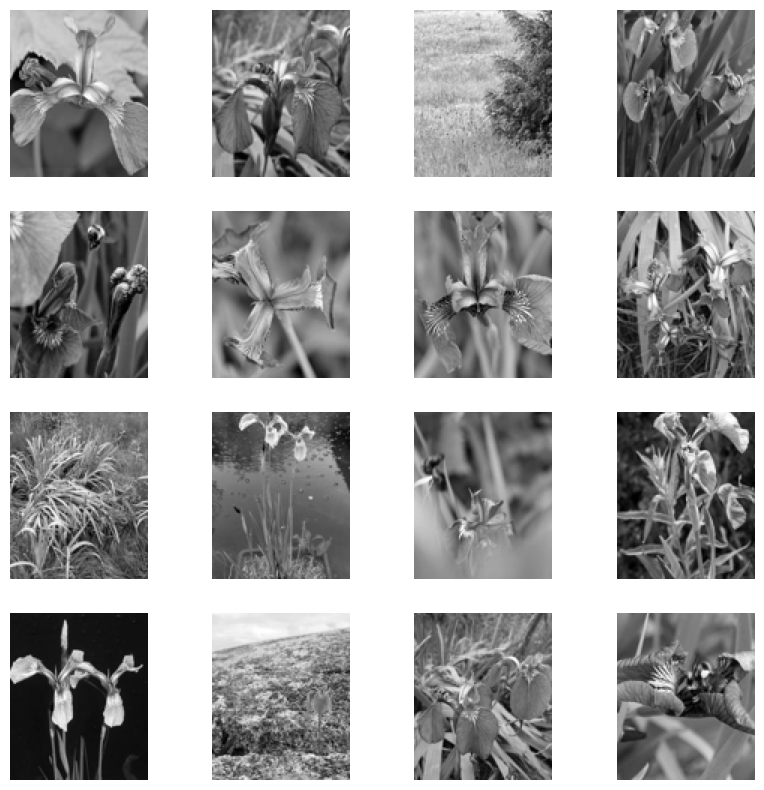

In [8]:
# Sample of Images
import matplotlib.pyplot as plt
fig, ax = plt.subplots(4, 4, figsize=(10, 10))
for i in range(16):
    ax[i//4, i%4].imshow(iris_images[i].reshape(112, 92), cmap='gray')
    ax[i//4, i%4].axis('off')

In [9]:
# Split dataset and combine with face dataset
X_train_iris = iris_images[1::2] # Odd rows for training
X_test_iris = iris_images[::2]  # Even rows for testing

y_train_iris = np.array([-1 for _ in range(X_train_iris.shape[0])])
y_test_iris = np.array([-1 for _ in range(X_test_iris.shape[0])])

print('Training set shape:', X_train_iris.shape)
print('Testing set shape: ', X_test_iris.shape)
print('Training labels shape:', y_train_iris.shape)
print('Testing labels shape: ', y_test_iris.shape)

face_non_face_training_data = np.concatenate((X_train, X_train_iris))
face_non_face_training_labels = np.concatenate((y_train, y_train_iris))

print('Training set shape:', face_non_face_training_data.shape)
print('Training labels shape:', face_non_face_training_labels.shape)

Training set shape: (600, 10304)
Testing set shape:  (600, 10304)
Training labels shape: (600,)
Testing labels shape:  (600,)
Training set shape: (800, 10304)
Training labels shape: (800,)


In [19]:
# PCA
from sklearn.neighbors import KNeighborsClassifier

alpha = 0.9
k = 1

U3, eigenvectors3 = PCA(face_non_face_training_data, alpha)
X_train_projected3 = face_non_face_training_data.dot(U3)
X_test_projected3 = X_test_iris.dot(U3)
classifer = KNeighborsClassifier(n_neighbors=k)
classifer.fit(X_train_projected3, face_non_face_training_labels)
accuracy = classifer.score(X_test_projected3, y_test_iris)
print(f'Accuracy for PCA [AT K={k}]: {accuracy}')

Accuracy for PCA [AT K=1]: 0.94


In [21]:
from sklearn.metrics import classification_report

print(classification_report(y_test_iris, classifer.predict(X_test_projected3)))

              precision    recall  f1-score   support

          -1       1.00      0.94      0.97       600
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          17       0.00      0.00      0.00         0
          22       0.00      0.00      0.00         0
          23       0.00      0.00      0.00         0
          24       0.00      0.00      0.00         0
          26       0.00      0.00      0.00         0
          29       0.00      0.00      0.00         0
          30       0.00      0.00      0.00         0
          31       0.00      0.00      0.00         0
          33       0.00      0.00      0.00         0
          36       0.00      0.00      0.00         0
          37       0.00    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

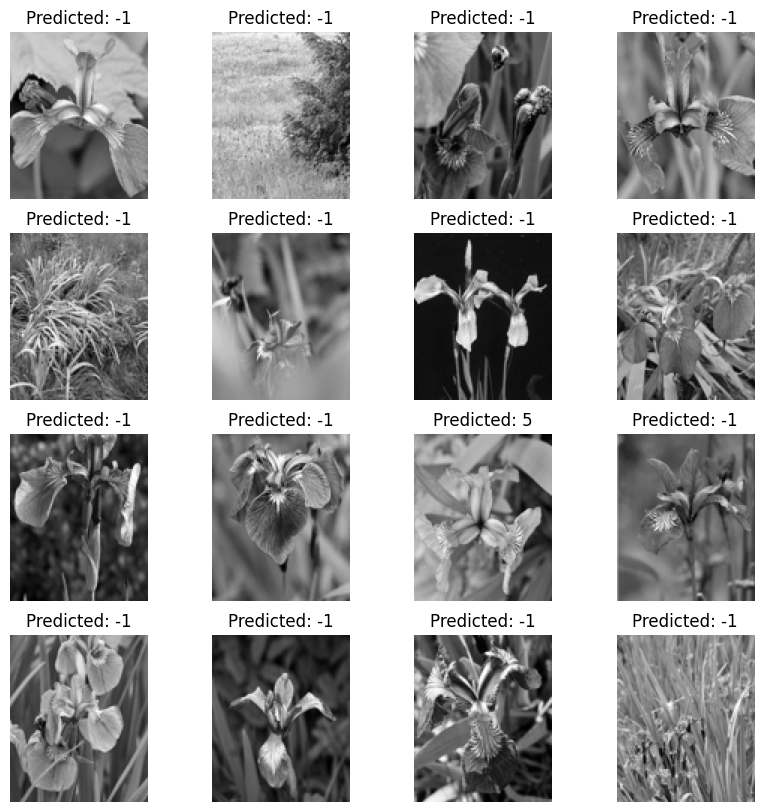

In [28]:
# Show Success/Failure

fig, ax = plt.subplots(4, 4, figsize=(10, 10))
for i in range(4*4):
    ax[i//4, i%4].imshow(X_test_iris[i].reshape(112, 92), cmap='gray')
    ax[i//4, i%4].set_title(f'Label: {y_test_iris[i]}')
    ax[i//4, i%4].axis('off')
    ax[i//4, i%4].set_title(f'Predicted: {classifer.predict([X_test_projected3[i]])[0]}')

In [10]:
# Accuracy VS Size of Non-Face Dataset
from sklearn.neighbors import KNeighborsClassifier

alpha = 0.9
PCA_accuracies = []
sizes = [100, 300, 500, 700]
for size in sizes:
    face_non_face_training_data = np.concatenate((X_train, X_train_iris[:size]))
    face_non_face_training_labels = np.concatenate((y_train, y_train_iris[:size]))
    U7, eigenvectors7 = PCA(face_non_face_training_data, alpha)
    X_train_projected7 = face_non_face_training_data.dot(U7)
    X_test_projected7 = X_test_iris.dot(U7)
    classifer = KNeighborsClassifier(n_neighbors=1)
    classifer.fit(X_train_projected7, face_non_face_training_labels)
    accuracy = classifer.score(X_test_projected7, y_test_iris)
    PCA_accuracies.append(accuracy)
    print(f'Accuracy for PCA [AT Size={size}]: {accuracy}')

Accuracy for PCA [AT Size=100]: 0.85
Accuracy for PCA [AT Size=300]: 0.9183333333333333
Accuracy for PCA [AT Size=500]: 0.935
Accuracy for PCA [AT Size=700]: 0.94


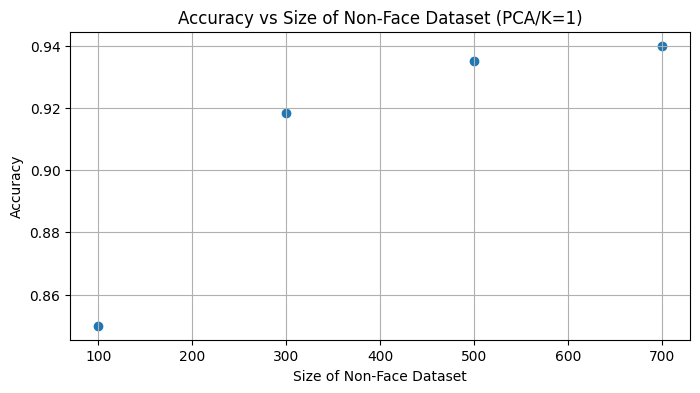

In [17]:
# Plot Accurcy VS Size of Non-Face Dataset
plt.scatter(sizes, PCA_accuracies)
plt.xlabel('Size of Non-Face Dataset')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Size of Non-Face Dataset (PCA/K=1)')
plt.gcf().set_size_inches(8, 4)
plt.grid()
plt.show()

#### Criticize the accuracy measure for large numbers of non-faces
images in the training data.
As the number of non-face dataset increases, the accuracy of the classifer increases. This is mainly because the model learns more images that are not faces.

#### How many dominant eigenvectors will you use for the LDA solution?
40 Eigenvectors will be used for the LDA solution, because we now have an additional class that represents all non-facial images, it takes the label -1.


In [18]:
# LDA
from sklearn.metrics import classification_report

eigenvalues8, U8 = LDA(face_non_face_training_data, face_non_face_training_labels, 40)
X_train_lda8 = np.dot(face_non_face_training_data, U8)
X_test_lda8 = np.dot(X_test_iris, U8)
kn = KNeighborsClassifier(n_neighbors=1)
kn.fit(X_train_lda8, face_non_face_training_labels)
accuracy_lda = kn.score(X_test_lda8, y_test_iris)

print(f'Accuracy for LDA: {accuracy_lda}')
print(classification_report(y_test_iris, kn.predict(X_test_lda8)))

Accuracy for LDA: 0.985
              precision    recall  f1-score   support

          -1       1.00      0.98      0.99       600
          14       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         0
          19       0.00      0.00      0.00         0
          22       0.00      0.00      0.00         0
          33       0.00      0.00      0.00         0
          37       0.00      0.00      0.00         0

    accuracy                           0.98       600
   macro avg       0.14      0.14      0.14       600
weighted avg       1.00      0.98      0.99       600



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

### Bonus

In [4]:
X_train_NEW = []
X_test_NEW = []
y_train_NEW = []
y_test_NEW = []

for subject_id in range(1, 41):
    for file_id in range(1, 11):
        img_vector = image_to_vector(f'data/archive/s{subject_id}/{file_id}.pgm')
        if file_id <= 7:
            X_train_NEW.append(img_vector)
            y_train_NEW.append(subject_id)
        else:
            X_test_NEW.append(img_vector)
            y_test_NEW.append(subject_id)

X_train_NEW = np.array(X_train_NEW)
X_test_NEW = np.array(X_test_NEW)
y_train_NEW = np.array(y_train_NEW)
y_test_NEW = np.array(y_test_NEW)

print('Training set shape:', X_train_NEW.shape)
print('Testing set shape: ', X_test_NEW.shape)
print('Training labels shape:', y_train_NEW.shape)
print('Testing labels shape: ', y_test_NEW.shape)


Training set shape: (280, 10304)
Testing set shape:  (120, 10304)
Training labels shape: (280,)
Testing labels shape:  (120,)


In [6]:
from sklearn.neighbors import KNeighborsClassifier

alphas = [0.8, 0.85, 0.9, 0.95]
PCA_projection_matrix_10 = []

for alpha in alphas:
    U, eigenvectors= PCA(X_train_NEW, alpha)
    PCA_projection_matrix_10.append([U, eigenvectors])


X_train_projected_10 = [X_train_NEW.dot(U[0]) for U in PCA_projection_matrix_10]
X_test_projected_10 = [X_test_NEW.dot(U[0]) for U in PCA_projection_matrix_10]
# Define the classifier
classifier = KNeighborsClassifier(n_neighbors=1)

# Train and predict for each projected training and test set
accuracies_10 = []
for X_train_proj, X_test_proj in zip(X_train_projected_10, X_test_projected_10):
    classifier.fit(X_train_proj, y_train_NEW)
    accuracy = classifier.score(X_test_proj, y_test_NEW)
    accuracies_10.append(accuracy)

print("Accuracy for different values of alpha:", accuracies_10)


Accuracy for different values of alpha: [0.9583333333333334, 0.9666666666666667, 0.9666666666666667, 0.95]


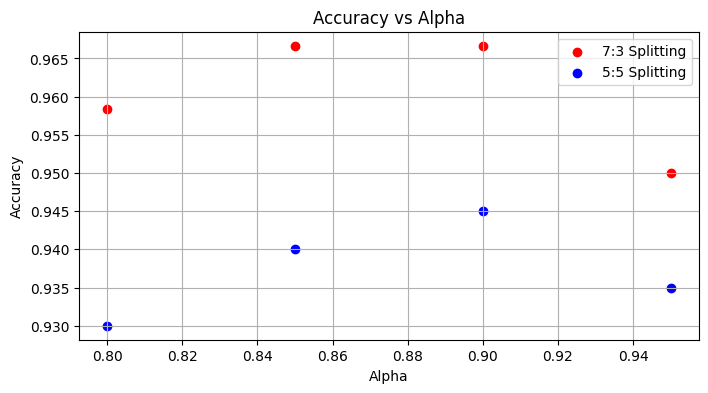

In [13]:
import matplotlib.pyplot as plt
plt.scatter(alphas, accuracies_10, label='7:3 Splitting', color='red')
plt.scatter(alphas, accuracies, label='5:5 Splitting', color='blue')
plt.legend()
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.grid()
plt.title('Accuracy vs Alpha')
plt.gcf().set_size_inches(8, 4)
plt.show()

In [16]:
# LDA
from sklearn.neighbors import KNeighborsClassifier

eigenvalues11, U11 = LDA(X_train_NEW, y_train_NEW)
X_train_lda_11 = np.dot(X_train_NEW, U11)
X_test_lda_11 = np.dot(X_test_NEW, U11)
kn = KNeighborsClassifier(n_neighbors=1)
kn.fit(X_train_lda_11, y_train_NEW)
accuracy_lda_11 = kn.score(X_test_lda_11, y_test_NEW)
print("Accuracy for LDA:", accuracy_lda_11)

KeyboardInterrupt: 